## <u> Building a Convolutional Neural Network <u/>

The purpose of developing this machine learning model is to be able to correctly classify images of cats and dogs.


### 1. Downloading and loading the dataset
To build this model, a sample of 3000 images is downloaded, from a larger dataset of 25000, into a directory using the os library and tesorflow. Using a smaller dataset avoids the use of a great deal of computing power and time as the CNN process can be highly demanding on the GPU.

In [1]:
# importing relevant libraries
import tensorflow as tf
import numpy as np
import os

In [2]:
# assigning the dataset to an object and defining a data path and directory
data_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

data_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=data_URL,extract=True)
data_dir = os.path.join(os.path.dirname(data_path), "cats_and_dogs_filtered")

print(data_path)
print(data_dir)

C:\Users\Amin\.keras\datasets\cats_and_dogs_filtered.zip
C:\Users\Amin\.keras\datasets\cats_and_dogs_filtered


### 2. Creating directories for the data
The contents of the zip file are extracted into relevant directories to organise the train, test, and validation datasets in a consistent directory structure.

In [3]:
# assigning the approriate directories based on cat and dog pictures
train_cats = os.path.join(data_dir,"train","cats") # directory with cat training images
train_dogs = os.path.join(data_dir,"train","dogs") # directroy with dog training images

#directories with validation cat and dog pictures
validation_cats = os.path.join(data_dir,"validation","cats") # directory with cat validation images
validation_dogs = os.path.join(data_dir,"validation","dogs") # directory with dog validation images

train_dir = os.path.join(data_dir,"train") # training directory
validation_dir = os.path.join(data_dir,"validation") # validation directory

In [4]:
# listing the filenames within each directory
train_cat_filenames = os.listdir(train_cats)
print(train_cat_filenames[:10])

train_dog_filenames = os.listdir(train_dogs)
train_dog_filenames.sort()
print(train_dog_filenames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [5]:
# 
print('total training cat images:', len(os.listdir(train_cats)))
print('total training dog images:', len(os.listdir(train_dogs)))
print('total validation cat images:', len(os.listdir(validation_cats)))
print('total validation dog images:', len(os.listdir(validation_dogs)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


### 3. Data Visualisation

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

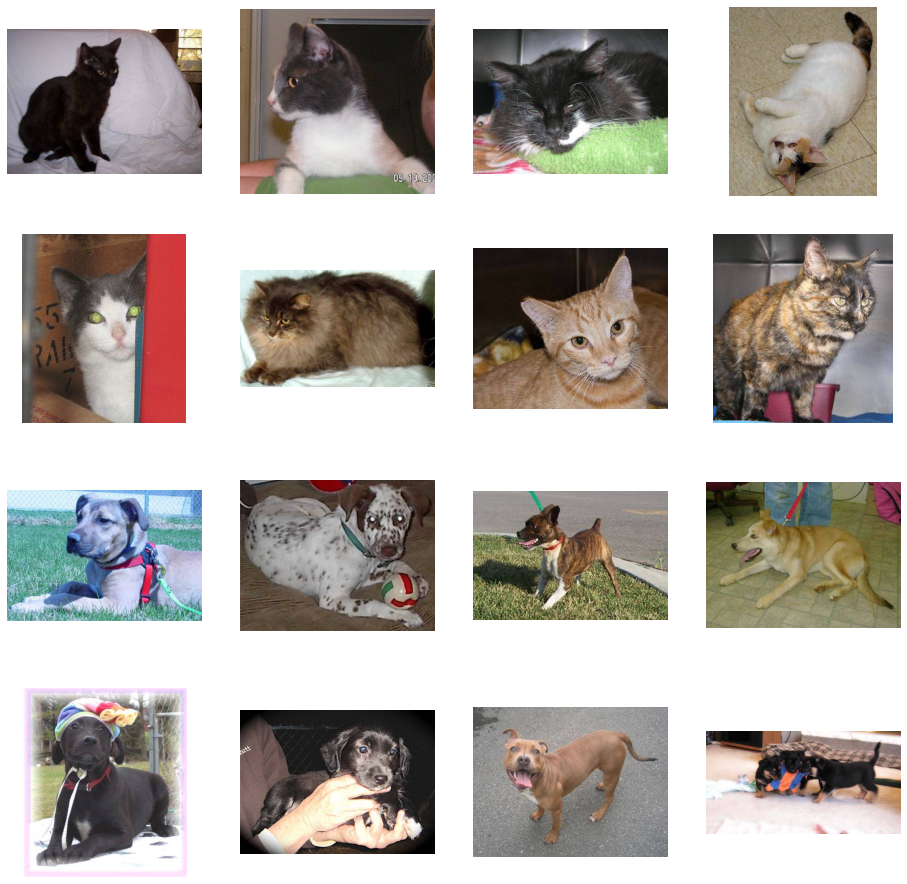

In [13]:
# visualising the data
fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows * 4)

pic_index += 8

#concatenate cat pictures and dog pictures
next_cat_pix = [os.path.join(train_cats, filename) 
                for filename in train_cat_filenames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs, filename) 
                for filename in train_dog_filenames[pic_index-8:pic_index]]


for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

### 4. Building the model
The model architecture consists of 4 different layers:

<b>i. Input layer</b>

The input layer represents the initial data that is inserted into the neural network i.e. the images of the cats and dogs
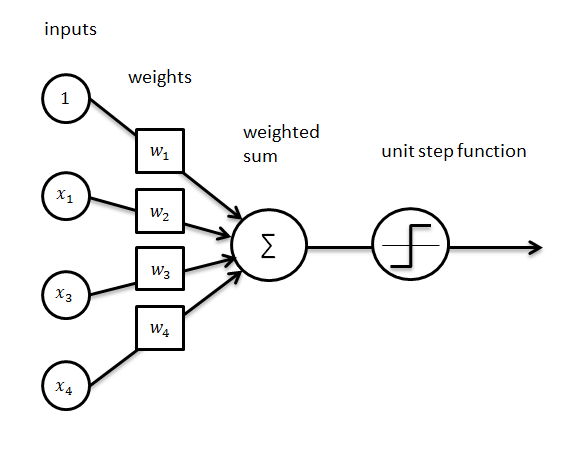
<center><font color='gray'>(Ognjanovsk, 2019)</font></center>

<b> ii. Convolution layer </b>
    
The convolution layer performs linear operations in the form of multiplication of a set of weights with the input layer. The convolution layer makes use of a filter that is smaller in size than the input layer and subsequently computes the dot product of different sections of the image which is mapped onto a feature. 
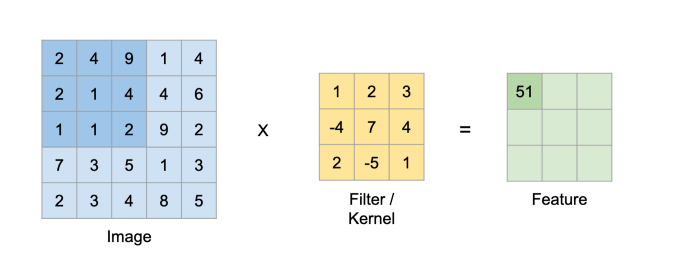
<center><font color='gray'>(Patel, 2019)</font></center>

By computing the dot product, each convolution narrows down the content of the image to granular detail. The convolution layers greatly increase the accuracy of the model. This model uses 3 convolutional layers with 16, 32, and 64 convolutions respectively.


<b>iii. Pooling layer</b>

The poolong layer reduces the spatial size of the convolved feature to reduce the computational power required to process the data  and also extract the more dominant features within the images.


<b>iv. Full connected layer</b>

This layer allows all the inputs from one layer to connect to the activiation unit of the next layer. It is a learning function for non-linear combinations of the features produced by the convolved layers.


Once the images are converted into a multi-level perceptron, the images are flattened into a column vector. The flatted output is fed into  a feed-forward neural network and backpropagation is apploed to every iteration of training.

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(150,150,3))

# first convolution
x = layers.Conv2D(16,3,activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# second convolution
x = layers.Conv2D(32,3,activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# third convolution
x = layers.Conv2D(64,3,activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [15]:
# flattening into a column vector
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

The "Output Shape" column displays the size of the feature map in each successive layer. The convolution layers slightly reduce the size of the feature maps due to padding and the pooling layers halve the dimensions.

In [17]:
from tensorflow.keras.optimizers import RMSprop # optimiser

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001), # learning rate
              metrics=['acc'])

Since this is a binary classification problem, binary_crossentropy is used as the loss metric. The RMSprop is an optimiser with a learning rate of 0.001.

### 5. Data Pre-processing

Data pre-processing prepares the data to be run through the model in the training phase. Using the ImageDataGenerator, the images are rescaled on a normalised scale of [0,1] (originally the values spanned the range [0,255]). The data generators conver the images to float32 tensors and feed them into the network with one generator for the training images and the other for the validation images.

The ImageDataGenerator allows the instantiation of batches of 20 images of size 150x150 and their respective labels. A relatively small batch size of 20 was selected to avoid a drastic shift from the intial weights of the model's inputs and poor generalisation (Shen, 2018).

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling the images to be fed into the CNNs
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 6. Training

Once the data is ready to be run through the model, the parameters are set. To avoid lengthly processing times, this model is run with 15 epochs.

In [20]:
# Running the model on a GTX 1060 GPU
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100, 
        epochs=15,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=1)

C:\Users\Amin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 [==============================] - 28s 275ms/step - loss: 1.0288 - acc: 0.5145 - val_loss: 0.6343 - val_acc: 0.6260
Epoch 2/15
100/100 [==============================] - 18s 185ms/step - loss: 0.6331 - acc: 0.6329 - val_loss: 0.5892 - val_acc: 0.6880
Epoch 3/15
100/100 [==============================] - 20s 195ms/step - loss: 0.5473 - acc: 0.7137 - val_loss: 0.5974 - val_acc: 0.6740
Epoch 4/15
100/100 [==============================] - 19s 188ms/step - loss: 0.4875 - acc: 0.7603 - val_loss: 0.5659 - val_acc: 0.7160
Epoch 5/15
100/100 [==============================] - 19s 187ms/step - loss: 0.3896 - acc: 0.8249 - val_loss: 0.6155 - val_acc: 0.7200
Epoch 6/15
100/100 [==============================] - 19s 188ms/step - loss: 0.2689 - acc: 0.8970 - val_loss: 0.6580 - val_acc: 0.7260
Epoch 7/15
100/100 [==============================] - 19s 187ms/step - loss: 0.1913 - acc: 0.9289 - val_loss: 0.8049 - val_acc: 0.7060
Epoch 8/15
100/100 [==============================] - 1

C:\Users\Amin\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


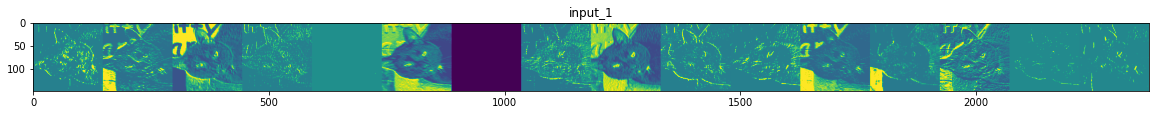

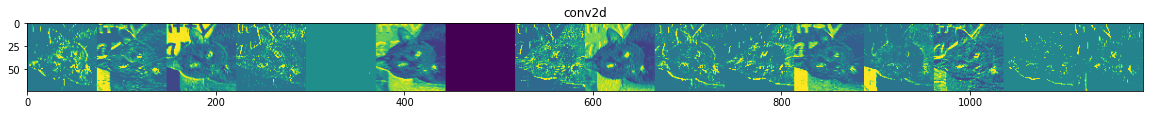

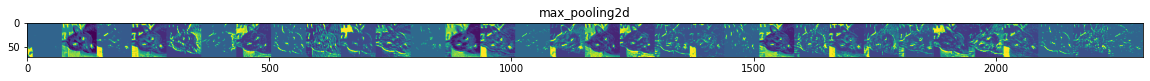

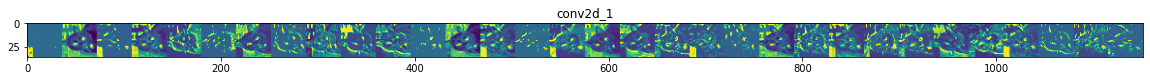

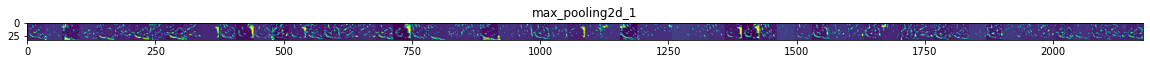

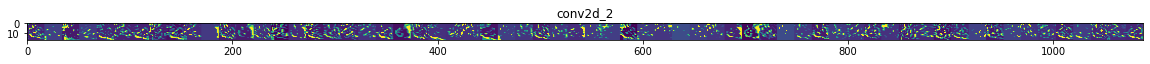

In [23]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualisation_model = Model(img_input, successive_outputs)

cat_img_files = [os.path.join(train_cats,f) for f in train_cat_filenames]
dog_img_files = [os.path.join(train_dogs,f) for f in train_dog_filenames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150,150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255

successive_feature_maps = visualisation_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size,size*n_features))
        for i in range(n_features):
            x = feature_map[0,:,:,i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0,255).astype('uint8')
            display_grid[:,i*size : (i + 1) * size] = x
        
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

The images produced above visualise the process of convolutiuon and pooling. Input 1 represents the intial images and their raw pixels. As previously mentioned, the process of convolution maps the image onto a smaller feature - conv2d which is subsequently halved in the max_pooling2d layer. The images are increasing compressed to show fewer features being "activated". Most features are set to zero, this is called "sparsity". The few features that remain activated are used to classify the images.

Training Accuracy: 0.9925000071525574
Validation Accuracy: 0.7239999771118164
Training Loss 0.024540936574339867
Training Loss 1.8879029750823975


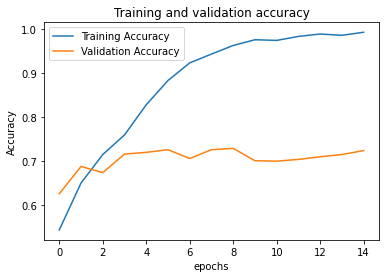

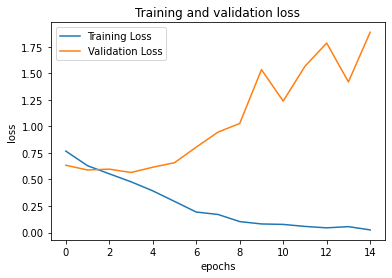

In [86]:
# Evaluating the accuracy of the model

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print('Training Accuracy:', acc[14])
print('Validation Accuracy:', val_acc[14])
print('Training Loss', loss[14])
print('Training Loss', val_loss[14])

plt.plot(epochs, acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

The graph shows a training accuracy of 99.3% and a validation accuracy of 72.4%. The discrepancy between the training and validation accuracies represents the issue of overfitting. The model performs exceptionally accurately with images it has trained with, however, can only accurately predict new images approximately 3 out of 4 times. The validation loss also appears to be drastically greater than the training loss.

Overfitting occurs as a result of the machine picking up on noise and other irrelevant patterns in the training images which do not categorise the class of an image. When this is applied to unseen images it causes the predictive capability of the machine to decrease.



### 7. Enhancing the CNN by applying Augmentation

An effective technique in overcoming the overfitting problem and improving the validation accuracy is through image augmentation. Images can be augmented through a variety of different techniques including rotation, width and height shift, shear, zoom, and horizontal flipping (Irla, 2019).

Data augmentation increases the diversity of the training through transformations. This allows the model to hone in on more features during the training phase whilst also reducing the impact of overfitting on the original input images. The augmentation layers applied to the images are only present during the training phase of the model.

In [56]:
# Horizontally flipping the images
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,horizontal_flip=True)

train_generator = image_gen.flow_from_directory(batch_size=20,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(150,150))

Found 2000 images belonging to 2 classes.


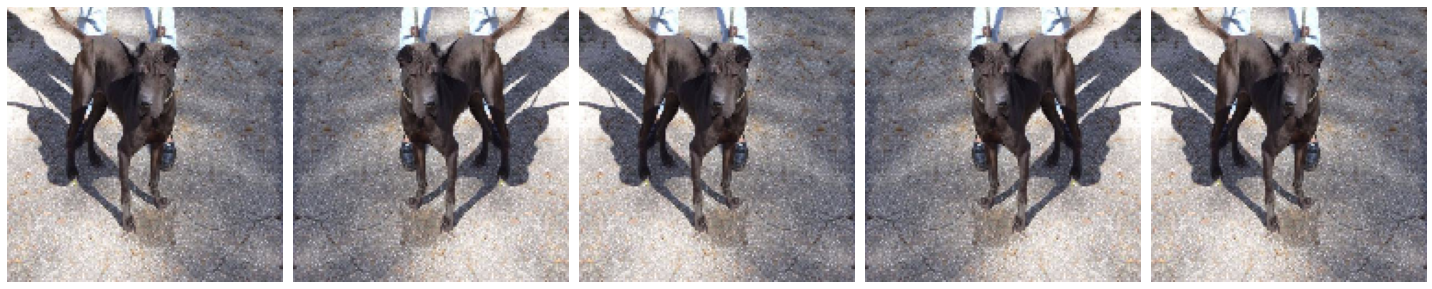

In [66]:
# Plotting a sample of the horizontally flipped images
sample_training_images, _ = next(train_generator)
 
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

augmented_images = [train_generator[0][0][0] for i in range(5)]

plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


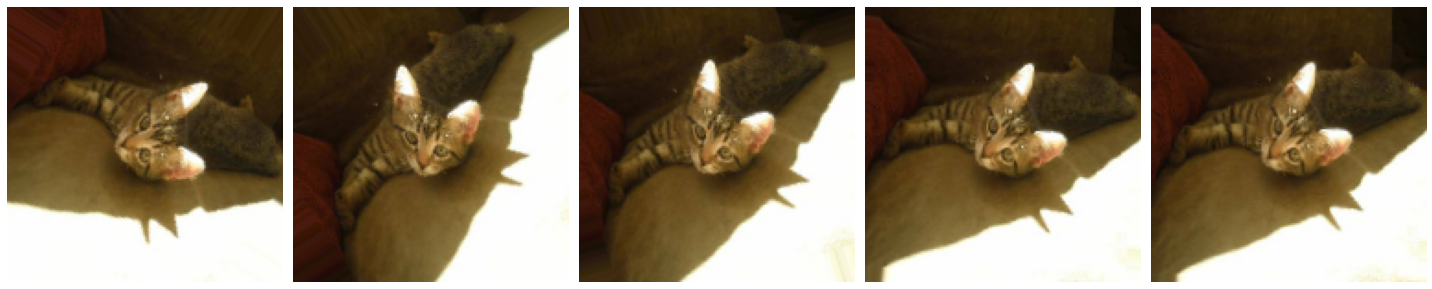

In [69]:
# Rotating the images and plotting a sample of the rotated images
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,rotation_range=45)
 
train_generator = image_gen.flow_from_directory(batch_size=20,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(150,150))
 
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


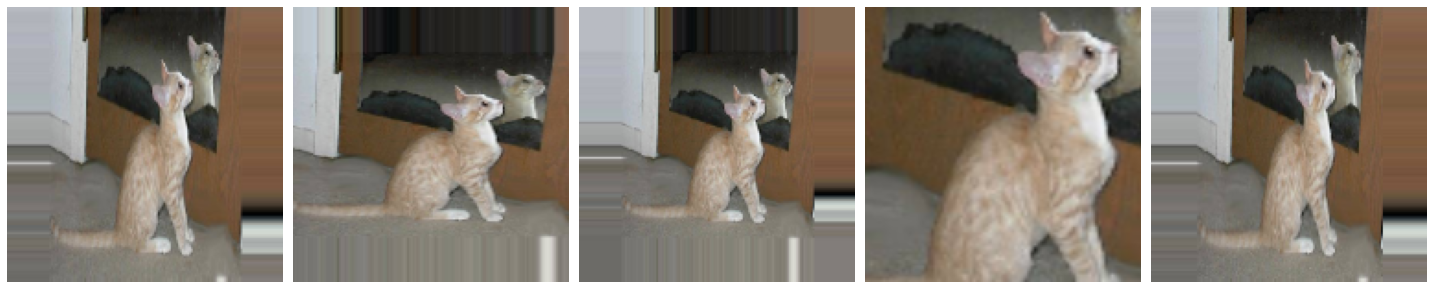

In [71]:
# Zooming into images and plotting a sample of the zoomed images
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.5)
 
train_generator = image_gen.flow_from_directory(batch_size=20,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(150,150))
 
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


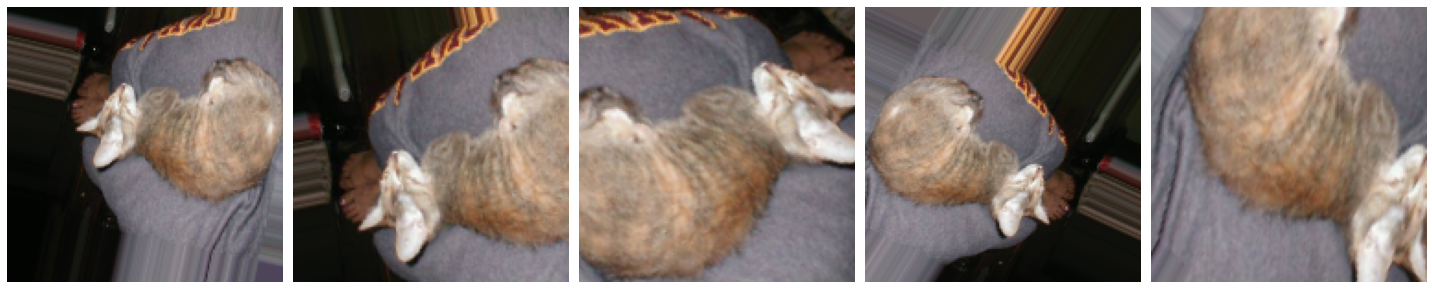

In [72]:
# Simultaneously enhancing the images through various techniques including rotation and zoom
image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                 rotation_range=45,
                                                                 width_shift_range=.15,
                                                                 height_shift_range=.15,
                                                                 horizontal_flip=True,
                                                                 zoom_range=0.5)
 
train_generator = image_gen_train.flow_from_directory(batch_size=20,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(150,150),
                                                    class_mode="binary")
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [73]:
# Rescaling the validation images to the approriate size
image_gen_val = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=20,
                                                directory=validation_dir,
                                                target_size=(150,150),
                                                class_mode="binary")

Found 1000 images belonging to 2 classes.


In [77]:
# Training the new model with the augmented images
model_new = tf.keras.Sequential([
    layers.Conv2D(16,3,activation="relu",input_shape=(150,150,3)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512,activation="relu"),
    layers.Dense(1)    
])
 
    

    
    
    
    
model_new.compile(optimizer="adam",
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=["accuracy"])
 
model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0

In [90]:
# running the new model
history_new = model_new.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50, # Increasing the epochs to ensure the model reaches plateu
    validation_data=validation_generator,
    validation_steps = 50)

Epoch 1/50
100/100 [==============================] - 26s 252ms/step - loss: 0.6318 - accuracy: 0.6020 - val_loss: 0.5991 - val_accuracy: 0.5910
Epoch 2/50
100/100 [==============================] - 23s 230ms/step - loss: 0.6052 - accuracy: 0.6220 - val_loss: 0.5767 - val_accuracy: 0.6420
Epoch 3/50
100/100 [==============================] - 23s 225ms/step - loss: 0.6119 - accuracy: 0.6215 - val_loss: 0.5893 - val_accuracy: 0.6620
Epoch 4/50
100/100 [==============================] - 24s 239ms/step - loss: 0.5959 - accuracy: 0.6505 - val_loss: 0.5903 - val_accuracy: 0.6270
Epoch 5/50
100/100 [==============================] - 24s 240ms/step - loss: 0.6014 - accuracy: 0.6285 - val_loss: 0.5804 - val_accuracy: 0.6340
Epoch 6/50
100/100 [==============================] - 23s 226ms/step - loss: 0.5908 - accuracy: 0.6555 - val_loss: 0.5700 - val_accuracy: 0.6950
Epoch 7/50
100/100 [==============================] - 23s 229ms/step - loss: 0.5681 - accuracy: 0.6875 - val_loss: 0.5716 - val_ac

Training Accuracy: 0.7074999809265137
Validation Accuracy 0.6890000104904175
Training Loss 0.5466437935829163
Validation Loss: 0.5471503138542175


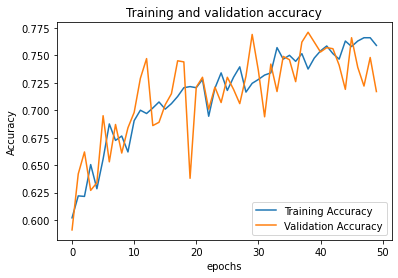

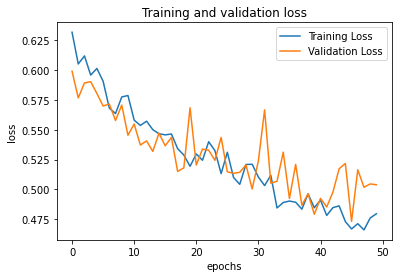

In [91]:
# Plotting graphs of the new model
accuracy = history_new.history['accuracy']
val_accuracy = history_new.history['val_accuracy']

loss = history_new.history['loss']
val_loss = history_new.history['val_loss']

epochs = range(len(accuracy))

print('Training Accuracy:', accuracy[14])
print('Validation Accuracy', val_accuracy[14])
print('Training Loss', loss[14])
print('Validation Loss:', val_loss[14])

plt.plot(epochs, accuracy, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

After implementing augmentation it is clear that the overfitting problem has improved as there is a much smaller discrepancy between the validation and training accuracy. In addition, there was a significant improvement in the validation loss curve. However, to further significantly improve the accuracy of the model, transfer learning can be used.

### 8. Improving the model using transfer learning

Transfer learning is used in computer vision to accurately and efficiently build models by leveraging previous learning. It makes use of patterns that have already been learned by a machine to avoid starting training from scratch. Pre-trained are typically models that have been trained on large datasets, which makes them ideal for transfer learning.

Pre-trained models are based on larger convolutional neural networks. The architecture of a CNN is based on two parts:
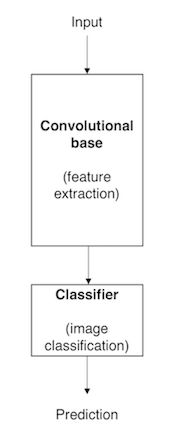
<center><font color='gray'>(Marcelino, 2018)</font></center>

The former convolutional base stage is composed of the convolutional and pooling layers previously described. Since this layer depends on hierarchical feature representation (as visiualised in the convolution and pooling process), the earlier layers (closer to the input) represent the computation of general features that can be reused in similar classification problems. Towards the final layers the features become specific to the images used in training and thus become less useful in transfer learning as they would likely be overfit.

Computer vision and transfer learning products are offered via Machine Learning as a service (MLaaS) platforms by organisations such as Microsoft and Google. MLaaS platforms are cloud-based platforms which provide various machine learning services including pre-trained models. Google offers Cloud Vision and AutoML that are applicable for various problems including the classification of images of cats and dogs. Similarly, Microsoft offers Microsoft Cognitive Services which apply to this scenario.

There are 3 main approaches to incorporating a pre-trained model such as Google's or Microsoft's:
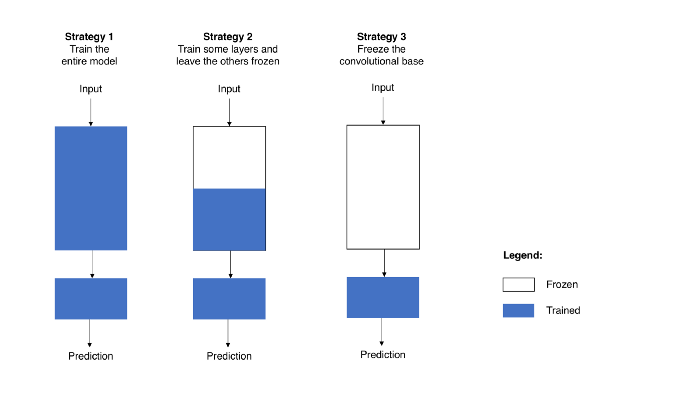
<center><font color='gray'>(Marcelino, 2018)</font></center>

<b>i. Train the entire model</b>

Architecture of the pre-trained model is used to train according to our dataset.

<b>ii. Train some layers and leave the others frozen</b>

Weights of the former and latter layers (lower and higher layers) are adjusted to train the model. Lower layers are those that show more general features and higher layers are those that are processed to the degree where features are highly specific to the training images. Typically, when using a small dataset, more layers are frozen (not changed during training) to avoid overfitting. Therefore, for this model, this would be the most approriate method of incorporating the pre-trained models

<b>iii. Freeze the convolutional base</b>

The convolutional base is kept in its original form and outputs are used to feed the classifier i.e. the pre-trained model is used as a fixed feature with no training based on our own dataset. This is only desirable if the problem being solved is almost identical to the one the pre-trained model is based on.

As Strategy 2 is most approriate, in this case, it is important to consider the parameters to be frozen. Typically, using a smaller learning rate is useful to avoid increasing the previous knowledge trained by the pre-trained model and avoid over-adjusting the weights.

### References

Marcelino, P., 2018. Transfer learning from pre-trained models. [online] Medium. Available at: <https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751> [Accessed 15 August 2021].

Ognjanovsk, G., 2019. Everything you need to know about Neural Networks and Backpropagation — Machine Learning Made Easy…. [online] Medium. Available at: <https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a> [Accessed 15 August 2021].

Patel, K., 2019. Convolution Neural Networks — A Beginner’s Guide [Implementing a MNIST Hand-written Digit…. [online] Medium. Available at: <https://towardsdatascience.com/convolution-neural-networks-a-beginners-guide-implementing-a-mnist-hand-written-digit-8aa60330d022> [Accessed 15 August 2021].

Irla, T., 2019. End to End Image Classification project using TensorFlow. [online] Medium. Available at: <https://medium.com/analytics-vidhya/end-to-end-image-classification-project-using-tensorflow-46e78298fa2f> [Accessed 15 August 2021].

Shen, K., 2018. Effect of batch size on training dynamics. [online] Medium. Available at: <https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e> [Accessed 15 August 2021].